# Task 1: Term Deposit Subscription Prediction
DevelopersHub Corporation-Data Science & Analytics Advanced Internship

# Problem Statement & Objective
# Problem Statement

Banks run marketing campaigns to convince customers to subscribe to term deposits. However, contacting every customer is costly and inefficient.

# Objective

To build a classification model that predicts whether a customer will subscribe to a term deposit (y) based on demographic, campaign, and economic features.

# Dataset Description & Loading
# Dataset

Name: Bank Marketing Dataset

Source: UCI Machine Learning Repository

Records: 41,188

Target Variable: y (yes/no)

# Citation

Moro et al., 2014 – Decision Support Systems

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

# Display first rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

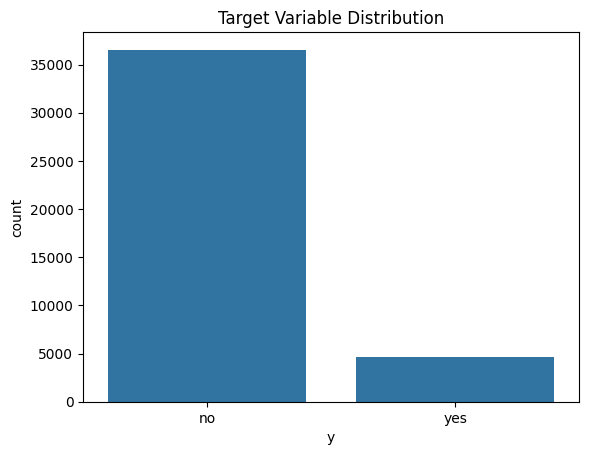

In [3]:
# Data Exploration (EDA)
# Dataset Shape & Info

df.shape
df.info()

# Target Distribution

df['y'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.show()

In [4]:
# Data Cleaning & Preprocessing
# Separate Features & Target

X = df.drop('y', axis=1)
y = df['y'].map({'yes':1, 'no':0})

# Encode Categorical Features

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

In [5]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
# Model Building
# Model 1: Logistic Regression

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

# Model 2: Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

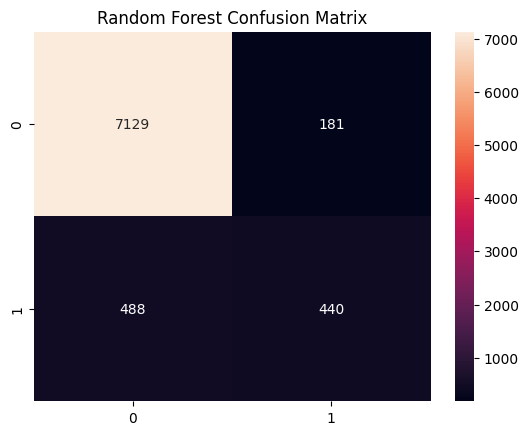

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Random Forest Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      7310
           1       0.71      0.47      0.57       928

    accuracy                           0.92      8238
   macro avg       0.82      0.72      0.76      8238
weighted avg       0.91      0.92      0.91      8238



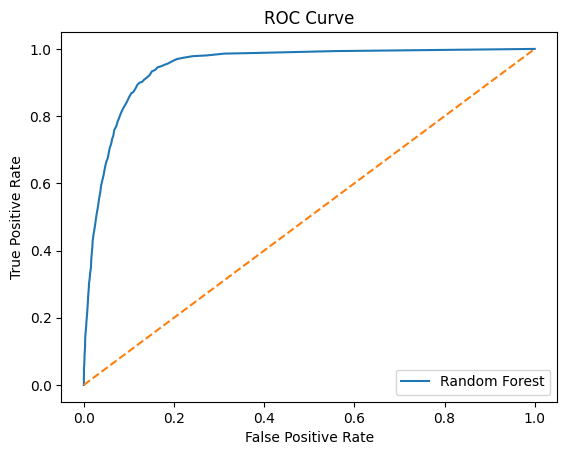

In [7]:
# Model Evaluation
# Predictions

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

# F1 Score & Classification Report

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve

y_prob_rf = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

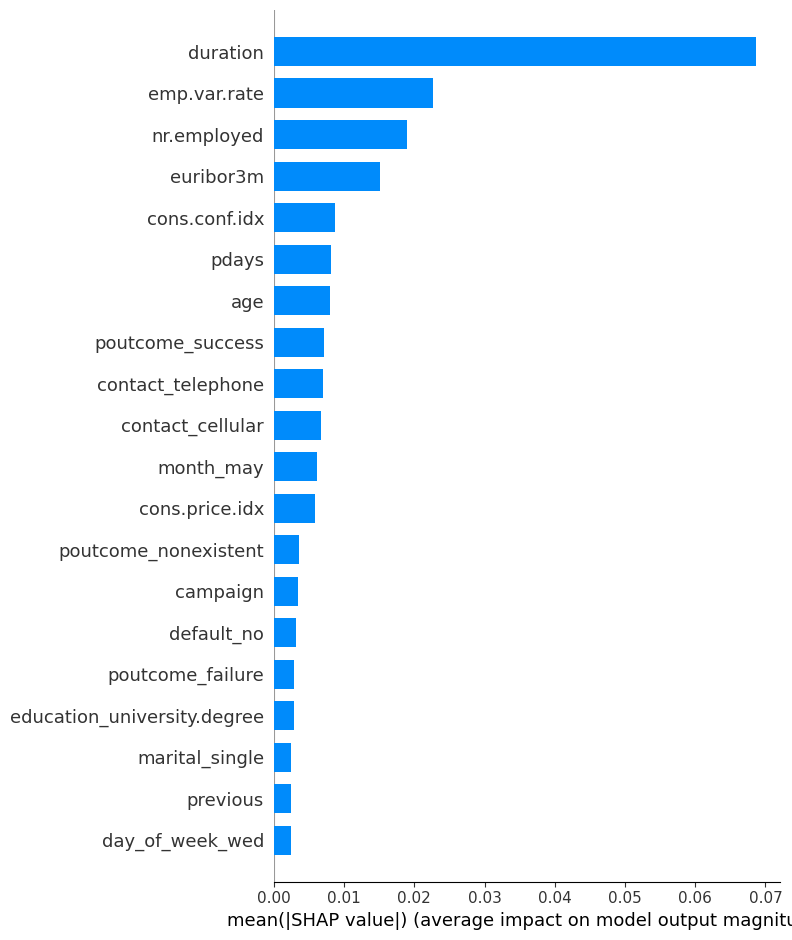

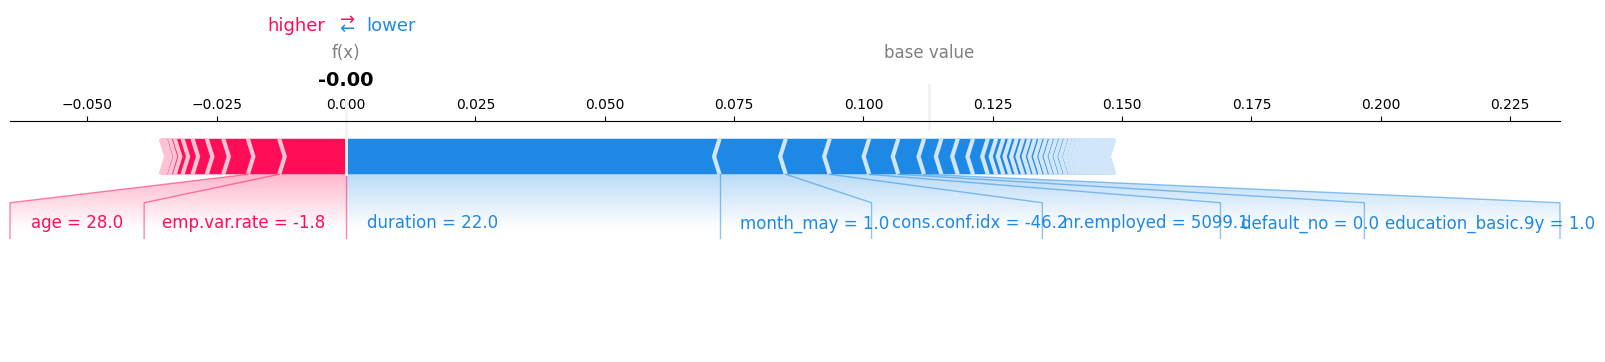

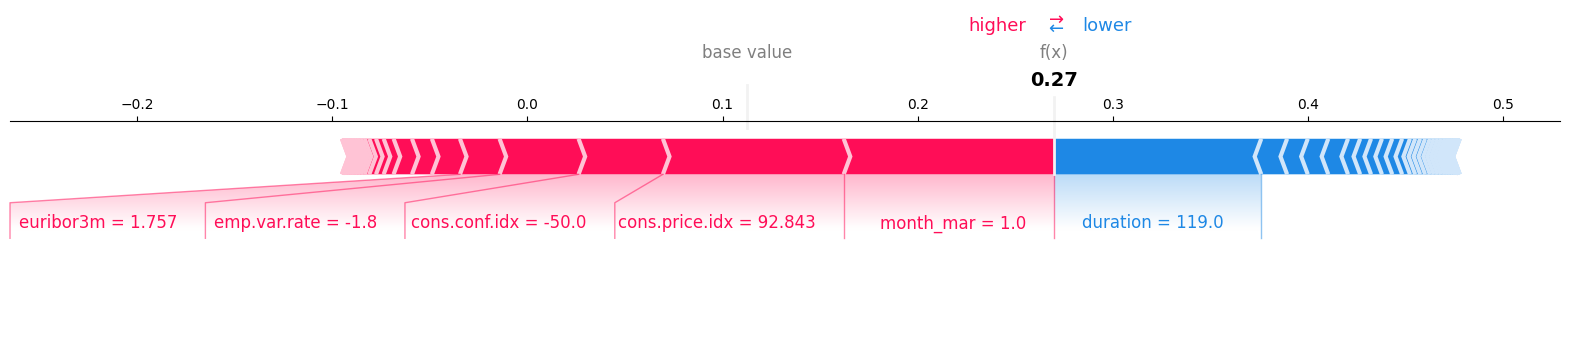

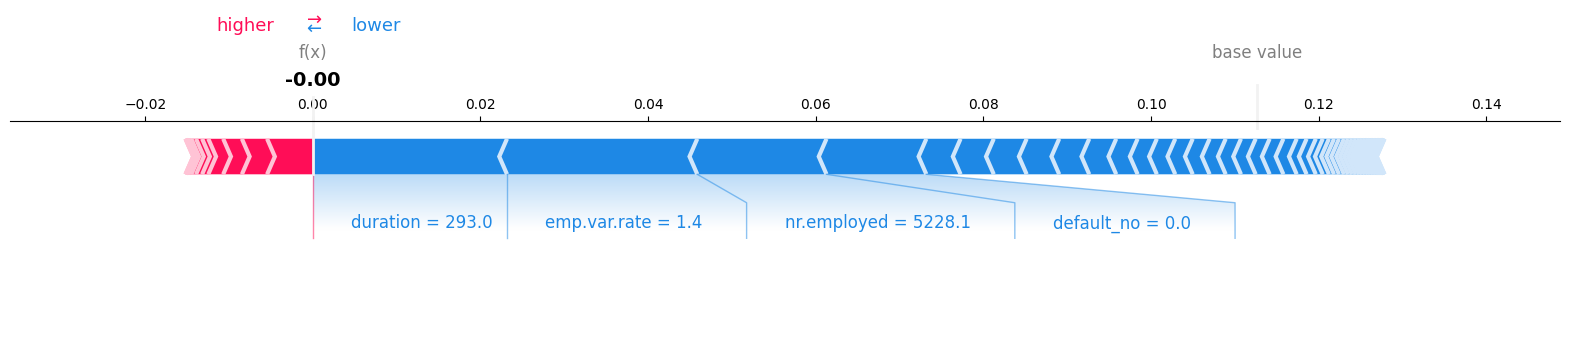

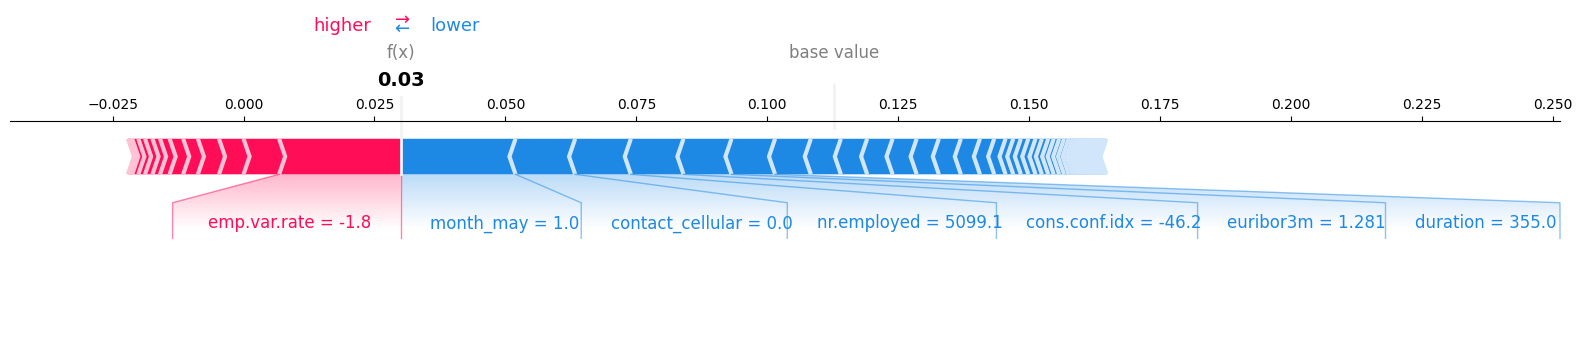

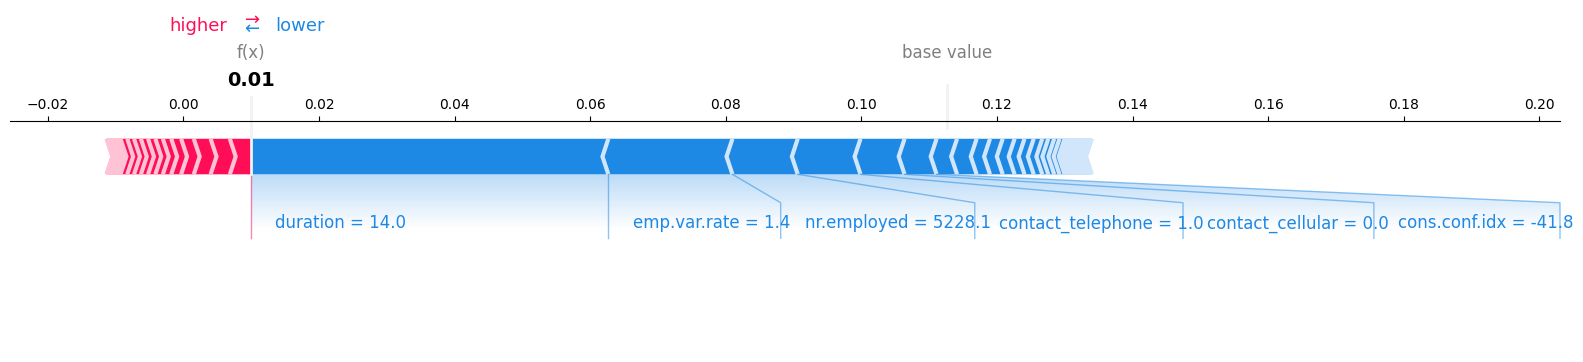

In [15]:
# Explainable AI (SHAP)

!pip install shap

import shap
import numpy as np
from scipy import sparse

# Extract trained components
preprocessor = rf_model.named_steps['preprocessing']
rf = rf_model.named_steps['classifier']

# Take a small sample (required for speed)
X_sample_df = X_train.sample(200, random_state=42)
X_sample = preprocessor.transform(
    X_sample_df
)
# Ensure dense
if sparse.issparse(X_sample):
    X_sample = X_sample.toarray()
# Create explainer
explainer = shap.TreeExplainer(rf)

# IMPORTANT: let SHAP return correct structure
shap_values = explainer(X_sample)

# Get feature names after preprocessing for better plotting
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
numeric_feature_names = numeric_cols.tolist()
all_feature_names = np.concatenate([categorical_feature_names, numeric_feature_names])

# For binary classification, we usually focus on the SHAP values for the positive class (index 1)
# shap_values.values will be (n_samples, n_features, n_classes)
shap_values_for_plot = shap_values.values[:, :, 1]
expected_value_for_plot = explainer.expected_value[1]

# Global Feature Importance
shap.summary_plot(
    shap_values_for_plot,
    X_sample,
    feature_names=all_feature_names,
    plot_type="bar",
    show=True
)
# Explain 5 Predictions
for i in range(5):
    shap.force_plot(
        expected_value_for_plot, # Global expected value for the positive class
        shap_values_for_plot[i], # SHAP values for the i-th instance for the positive class
        X_sample[i],             # Original feature values for the i-th instance
        feature_names=all_feature_names,
        matplotlib=True
    )

# Final Conclusion & Insights
# Key Findings

1. Random Forest outperformed Logistic Regression

2. Class imbalance affected recall for minority class

3. Call duration and campaign history are strong predictors

# Business Insight

Banks can optimize marketing campaigns by targeting customers with higher predicted subscription probability, reducing costs and increasing ROI.